In [18]:
import sys
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
import dataframe_image as dfi
import pandas as pd
dt = pd.to_datetime
try:
    importlib.reload(sys.modules['experiments'])
except Exception as e:
    print(e)
from experiments import *


In [19]:
universe = prepare_universe()
highbm = universe[universe.bm_quintile==4]
bulls, bears = classify_bulls_and_bears()


In [20]:
ports = compute_bull_bear_portfolios(highbm.query('symbol != "VIAC"'), bulls, bears)

p0 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p1 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p2 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p3 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p4 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p5 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p6 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p7 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p8 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p9 1980 actual earnings report year used 1981
1980 0 cannot run experiment
plo 1980 actual earnings report year used 1981
1980 0 cannot run experiment
pmid 1980 actual earnings report year used 1981
1980 0 cannot run experiment
phi 1980 actual earnings report year used 1981
1980 0 cannot run experiment
all 1980 actual earni

all 2022 actual earnings report year used 2021
2022-01-04 2022-10-11 filter= all pfolio_size 10 pool size 1434
p0 1980 actual earnings report year used 1979
1980 0 cannot run experiment
p1 1980 actual earnings report year used 1979
1980 0 cannot run experiment
p2 1980 actual earnings report year used 1979
1980 0 cannot run experiment
p3 1980 actual earnings report year used 1979
1980 0 cannot run experiment
p4 1980 actual earnings report year used 1979
1980 0 cannot run experiment
p5 1980 actual earnings report year used 1979
1980 0 cannot run experiment
p6 1980 actual earnings report year used 1979
1980 0 cannot run experiment
p7 1980 actual earnings report year used 1979
1980 0 cannot run experiment
p8 1980 actual earnings report year used 1979
1980 0 cannot run experiment
p9 1980 actual earnings report year used 1979
1980 0 cannot run experiment
plo 1980 actual earnings report year used 1979
1980 0 cannot run experiment
pmid 1980 actual earnings report year used 1979
1980 0 cannot r

phi 2020 actual earnings report year used 2019
2020-03-23 2022-01-03 filter= phi pfolio_size 10 pool size 44
all 2020 actual earnings report year used 2019
2020-03-23 2022-01-03 filter= all pfolio_size 10 pool size 1023
p0 2022 actual earnings report year used 2021
2022-10-12 2023-12-15 filter= p0 pfolio_size 10 pool size 112
p1 2022 actual earnings report year used 2021
2022-10-12 2023-12-15 filter= p1 pfolio_size 10 pool size 194
p2 2022 actual earnings report year used 2021
2022-10-12 2023-12-15 filter= p2 pfolio_size 10 pool size 176
p3 2022 actual earnings report year used 2021
2022-10-12 2023-12-15 filter= p3 pfolio_size 10 pool size 187
p4 2022 actual earnings report year used 2021
2022-10-12 2023-12-15 filter= p4 pfolio_size 10 pool size 178
p5 2022 actual earnings report year used 2021
2022-10-12 2023-12-15 filter= p5 pfolio_size 10 pool size 194
p6 2022 actual earnings report year used 2021
2022-10-12 2023-12-15 filter= p6 pfolio_size 10 pool size 227
p7 2022 actual earnings 

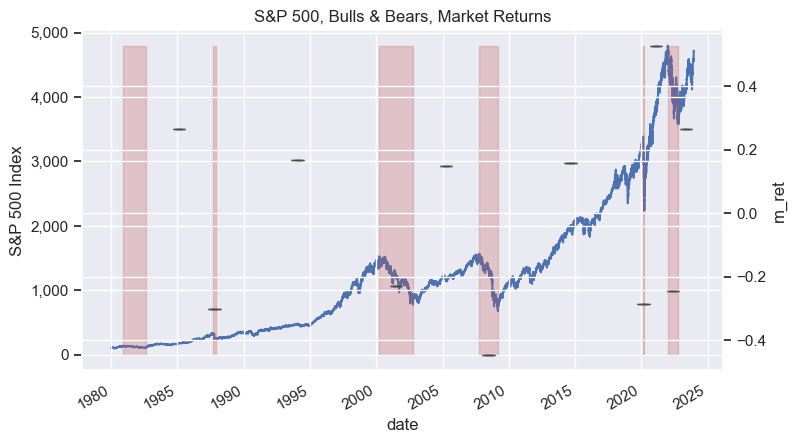

In [21]:
midpoint = pd.to_datetime(ports.start) + ((pd.to_datetime(ports.end) - pd.to_datetime(ports.start))/2)
p2 = ports.set_index(midpoint).query('group == "all"')
market_plot(bears)
plt.title('S&P 500, Bulls & Bears, Market Returns')
ax2 = plt.twinx()
fig = sns.boxplot(data=p2, x=p2.index, y="m_ret", ax=ax2, native_scale=True, width=1, fliersize=0)#, col='group')

## Demonstrate Non-lookahead (lagging) bull bear classification confounds problem with separate problem of regime classification

In [22]:
bulls1, bears1 = classify_bulls_and_bears_nonlookahead()
display(bears1)
display(bulls1)

,min,max
bearn,,
0,1982-02-22,1982-09-14
1,1987-10-19,1988-03-08
2,2001-03-12,2001-12-05
3,2002-07-10,2002-08-22
4,2008-07-09,2008-12-08
5,2009-02-23,2009-03-25
6,2020-03-12,2020-04-13
7,2022-06-13,2023-06-08


,min,max
bearn,,
0,1980-01-02,1982-02-22
1,1982-09-15,1987-10-19
2,1988-03-09,2001-03-12
3,2001-12-06,2002-07-10
4,2002-08-23,2008-07-09
5,2008-12-09,2009-02-23
6,2009-03-26,2020-03-12
7,2020-04-14,2022-06-13
8,2023-06-09,2023-12-15


In [23]:
ports1 = compute_bull_bear_portfolios(highbm.query('symbol != "VIAC"'), bulls1, bears1)

p0 1982 actual earnings report year used 1981
1982 0 cannot run experiment
p1 1982 actual earnings report year used 1981
1982 0 cannot run experiment
p2 1982 actual earnings report year used 1981
1982 0 cannot run experiment
p3 1982 actual earnings report year used 1981
1982 0 cannot run experiment
p4 1982 actual earnings report year used 1981
1982 0 cannot run experiment
p5 1982 actual earnings report year used 1981
1982 0 cannot run experiment
p6 1982 actual earnings report year used 1981
1982 0 cannot run experiment
p7 1982 actual earnings report year used 1981
1982 0 cannot run experiment
p8 1982 actual earnings report year used 1981
1982 0 cannot run experiment
p9 1982 actual earnings report year used 1981
1982 0 cannot run experiment
plo 1982 actual earnings report year used 1981
1982 0 cannot run experiment
pmid 1982 actual earnings report year used 1981
1982 0 cannot run experiment
phi 1982 actual earnings report year used 1981
1982 0 cannot run experiment
all 1982 actual earni

all 2009 actual earnings report year used 2008
2009-02-23 2009-03-25 filter= all pfolio_size 10 pool size 513
p0 2020 actual earnings report year used 2019
2020-03-12 2020-04-13 filter= p0 pfolio_size 5 pool size 5
p1 2020 actual earnings report year used 2019
2020-03-12 2020-04-13 filter= p1 pfolio_size 10 pool size 36
p2 2020 actual earnings report year used 2019
2020-03-12 2020-04-13 filter= p2 pfolio_size 10 pool size 77
p3 2020 actual earnings report year used 2019
2020-03-12 2020-04-13 filter= p3 pfolio_size 10 pool size 137
p4 2020 actual earnings report year used 2019
2020-03-12 2020-04-13 filter= p4 pfolio_size 10 pool size 190
p5 2020 actual earnings report year used 2019
2020-03-12 2020-04-13 filter= p5 pfolio_size 10 pool size 220
p6 2020 actual earnings report year used 2019
2020-03-12 2020-04-13 filter= p6 pfolio_size 10 pool size 204
p7 2020 actual earnings report year used 2019
2020-03-12 2020-04-13 filter= p7 pfolio_size 10 pool size 110
p8 2020 actual earnings report 

phi 2001 actual earnings report year used 2000
2001-12-06 2002-07-10 filter= phi pfolio_size 10 pool size 17
all 2001 actual earnings report year used 2000
2001-12-06 2002-07-10 filter= all pfolio_size 10 pool size 345
p0 2002 actual earnings report year used 2005
2002-08-23 2008-07-09 filter= p0 pfolio_size 2 pool size 2
p1 2002 actual earnings report year used 2001
2002-08-23 2008-07-09 filter= p1 pfolio_size 8 pool size 8
p2 2002 actual earnings report year used 2001
2002-08-23 2008-07-09 filter= p2 pfolio_size 10 pool size 16
p3 2002 actual earnings report year used 2001
2002-08-23 2008-07-09 filter= p3 pfolio_size 10 pool size 40
p4 2002 actual earnings report year used 2001
2002-08-23 2008-07-09 filter= p4 pfolio_size 10 pool size 76
p5 2002 actual earnings report year used 2001
2002-08-23 2008-07-09 filter= p5 pfolio_size 10 pool size 67
p6 2002 actual earnings report year used 2001
2002-08-23 2008-07-09 filter= p6 pfolio_size 10 pool size 70
p7 2002 actual earnings report year 

,start,end,market,group,raw_ret,raw_ret_pos,raw_avg_ret,raw_avg_ret_pos,p0,p10,p25,p50,p75,p90,max,ma_ret,ma_ret_pos,ma_avg_ret,ma_avg_ret_pos,m_ret,|P|
1987-12-28 12:00:00,1987-10-19,1988-03-08,bear,all,0.12,1.0,0.02,1.0,-0.1,-0.04,-0.02,4.75e-03,0.06,0.11,0.12,-0.07,0.0,-0.09,0.0,0.19,9
1987-12-28 12:00:00,1987-10-19,1988-03-08,bear,all,0.12,1.0,0.02,1.0,-0.1,-0.04,-0.02,4.75e-03,0.06,0.11,0.12,-0.07,0.0,-0.09,0.0,0.19,9
1987-12-28 12:00:00,1987-10-19,1988-03-08,bear,all,0.12,1.0,0.02,1.0,-0.1,-0.04,-0.02,4.75e-03,0.06,0.11,0.12,-0.07,0.0,-0.09,0.0,0.19,9
1987-12-28 12:00:00,1987-10-19,1988-03-08,bear,all,0.12,1.0,0.02,1.0,-0.1,-0.04,-0.02,4.75e-03,0.06,0.11,0.12,-0.07,0.0,-0.09,0.0,0.19,9
1987-12-28 12:00:00,1987-10-19,1988-03-08,bear,all,0.12,1.0,0.02,1.0,-0.1,-0.04,-0.02,4.75e-03,0.06,0.11,0.12,-0.07,0.0,-0.09,0.0,0.19,9


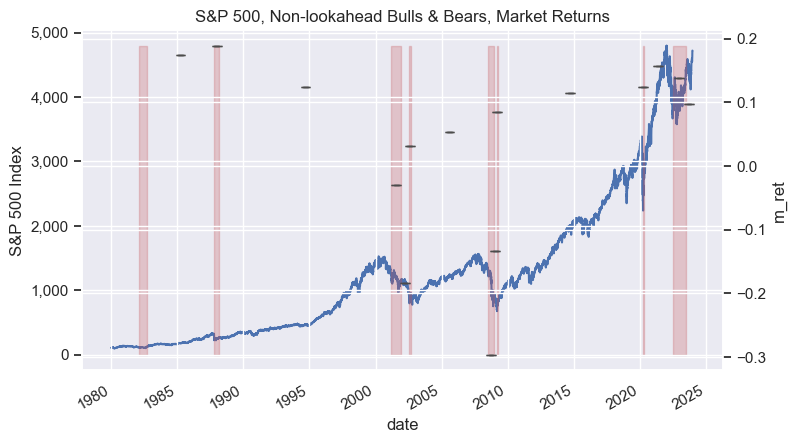

In [24]:
midpoint = dt(ports1.start) + ((dt(ports1.end) - dt(ports1.start))/2)
p2_2 = ports1.set_index(midpoint).query('group == "all"')
display(p2_2.head())
market_plot(bears1)
plt.title('S&P 500, Non-lookahead Bulls & Bears, Market Returns')
ax2 = plt.twinx()
fig = sns.boxplot(data=p2_2, x=p2_2.index, y="m_ret", ax=ax2, native_scale=True, width=5, fliersize=0)

## Back to original market regime classification

In [25]:
ports['covid_era'] = dt(ports.start) > dt('2018-01-01')
ports['midpoint'] = (dt(ports.start) + ((dt(ports.end) - dt(ports.start))/2))
# melt for sns
ports2 = pd.melt(ports, id_vars=['start', 'end', 'midpoint', 'market', 'group', 'covid_era', ], \
                 value_vars=['raw_ret', 'ma_ret', 'm_ret'], var_name='return_type')
# compute outliers
ports2 = identify_outliers(ports2, m=3)
ports2.head()

,start,end,midpoint,market,group,covid_era,return_type,value,grp_start_return_median,grp_start_return_median_dev,grp_start_return_median_mdev,outlier
0,1980-12-01,1982-08-11,1981-10-06,bear,market,False,raw_ret,-0.16,-0.16,0.0,0.0,False
1,1980-12-01,1982-08-11,1981-10-06,bear,market,False,raw_ret,-0.16,-0.16,0.0,0.0,False
2,1980-12-01,1982-08-11,1981-10-06,bear,market,False,raw_ret,-0.16,-0.16,0.0,0.0,False
3,1980-12-01,1982-08-11,1981-10-06,bear,market,False,raw_ret,-0.16,-0.16,0.0,0.0,False
4,1980-12-01,1982-08-11,1981-10-06,bear,market,False,raw_ret,-0.16,-0.16,0.0,0.0,False


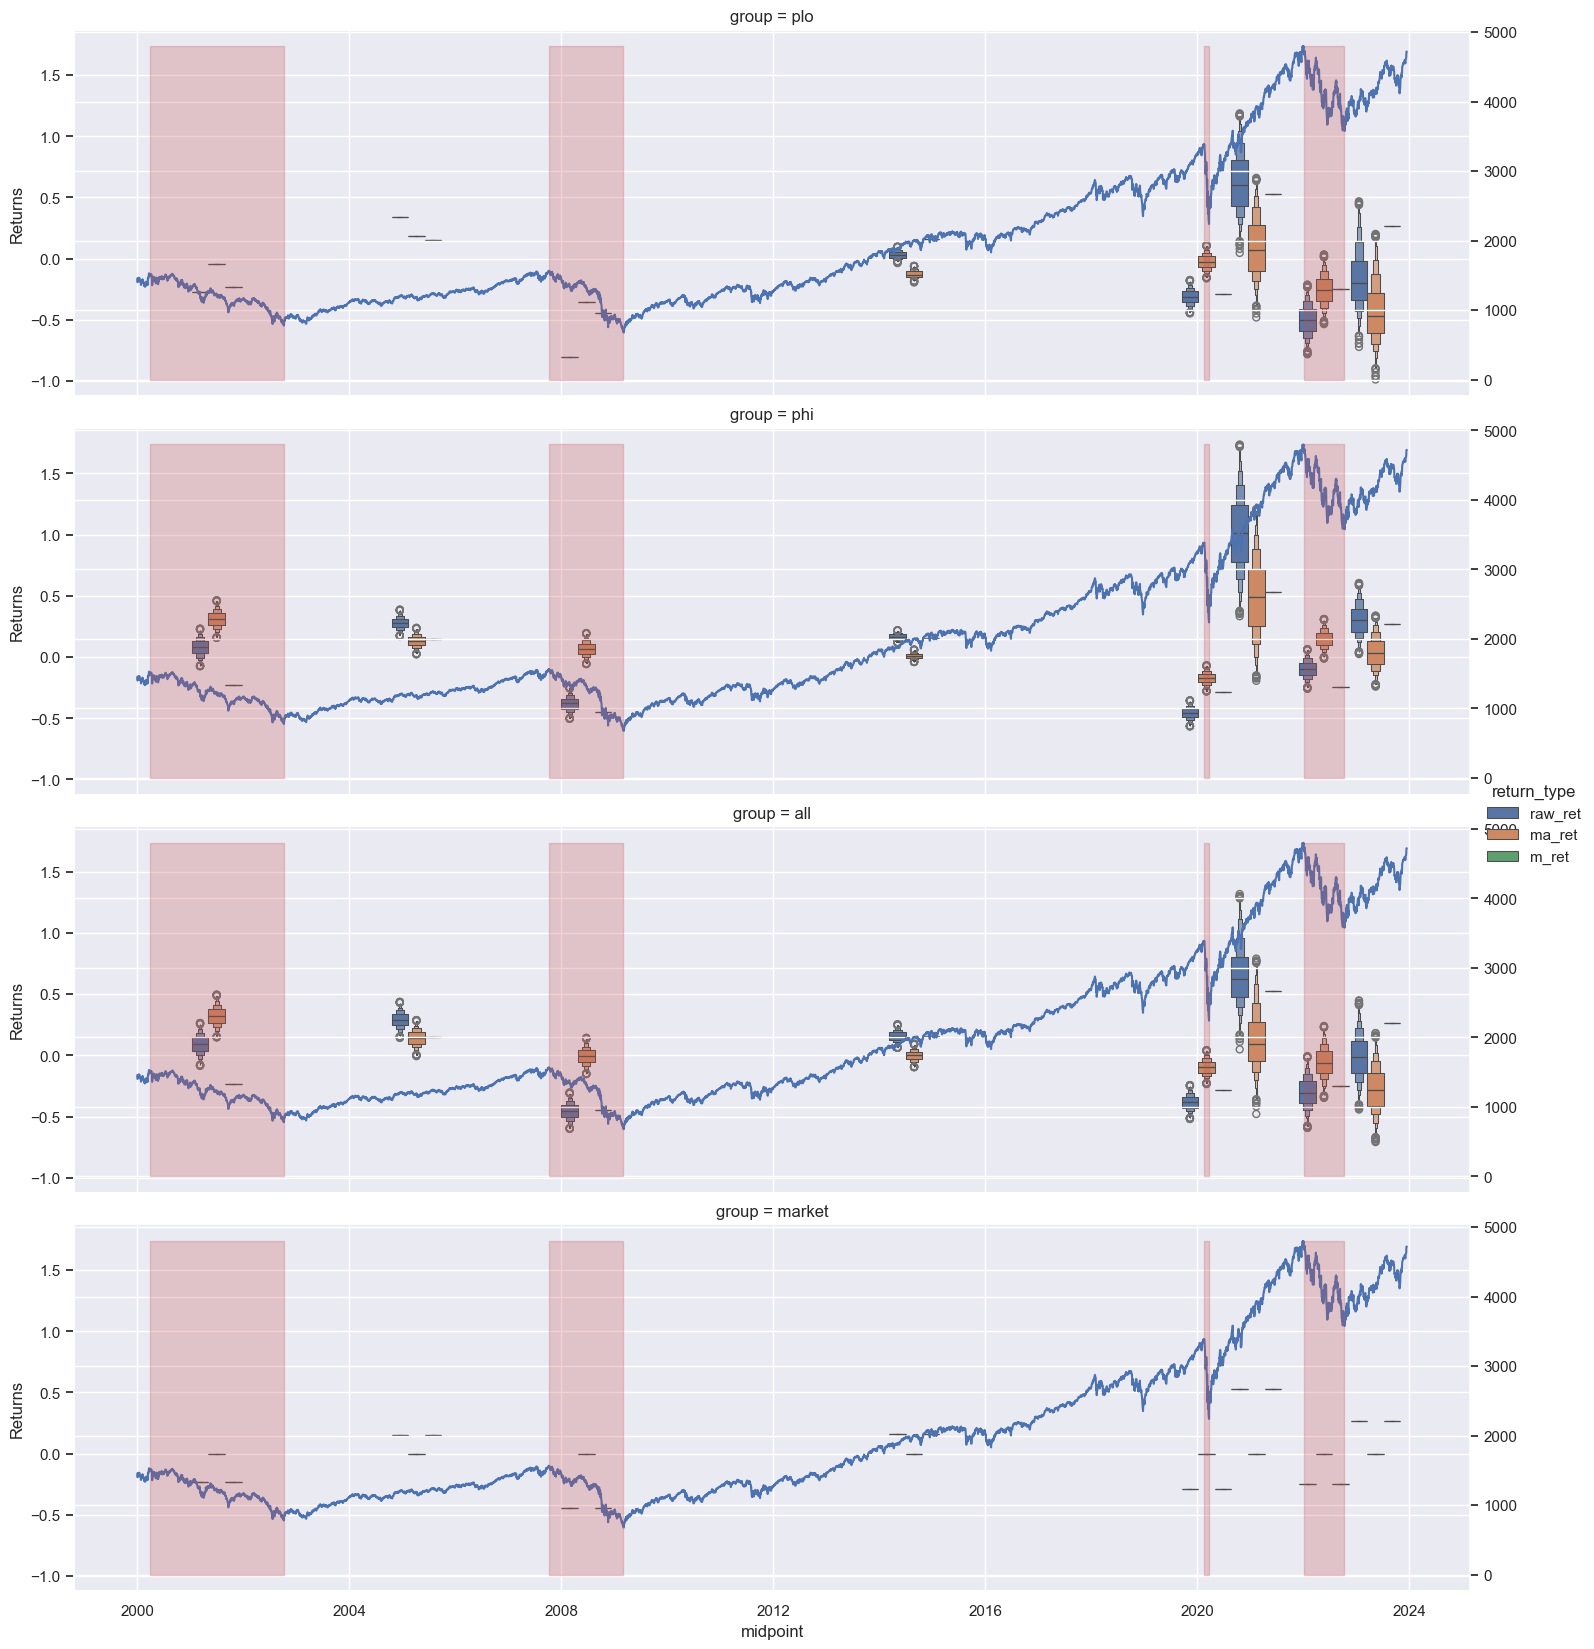

In [26]:
first_time_to_plot = pd.to_datetime('2000-01-01')
g = sns.catplot(data=
                ports2[(ports2.outlier == False)
                    & ports2.group.isin(['market', 'all', 'phi', 'plo'])
                    & (dt(ports2.start) > first_time_to_plot)
                ],
            x='midpoint', 
            y="value", 
            native_scale=True, 
            width=1, 
            row='group', 
            kind='boxen',
            hue='return_type',
            zorder=1,
            height = 5,
            aspect = 3,
           )
df = get_hist(MARKET_TICKER)[['adjClose']]

for group, ax in g.axes_dict.items():
    ax.set(ylabel='Returns')
    plt.setp(ax.lines, zorder=1)
    plt.setp(ax.collections, zorder=1, label="")
    ax2 = ax.twinx()
    plt.sca(ax2)
    plt.setp(ax2.lines, zorder=2)
    plt.setp(ax2.collections, zorder=2, label="")
    no_label_market_plot(bears[bears['min'] > first_time_to_plot], df[df.index > first_time_to_plot], z=2)
plt.show()

g.savefig("timeseries.png")

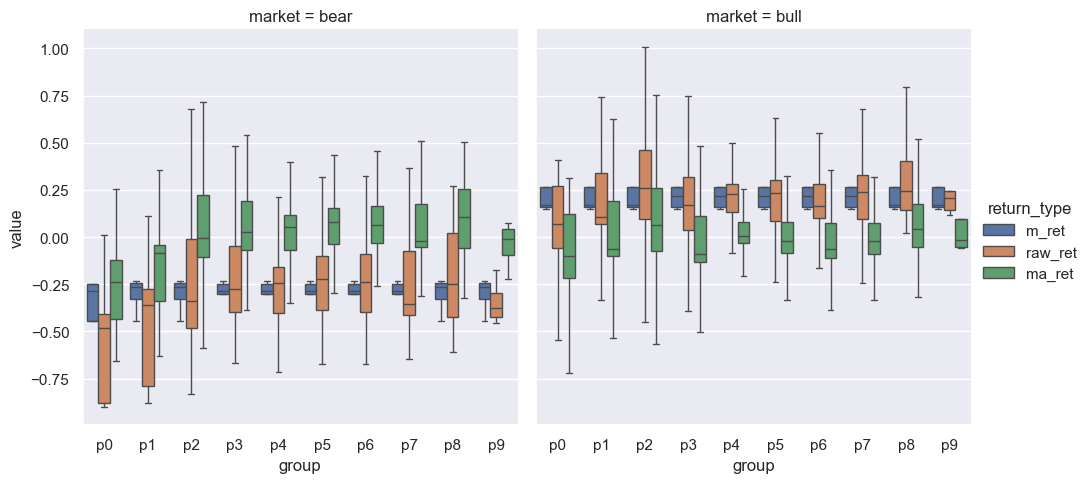

In [27]:
sort_rule = {f'p{i}': i for i in range(10)}
sns.set(rc={'figure.figsize':(8.27, 5)})
p = sns.catplot(
    data=filter_pscores(ports2)
    .sort_values(by=['market'])
    .sort_values(by=['group'], key=lambda series: series.apply(lambda x: sort_rule[x])),
    y="value", hue='return_type', x='group',kind="box",
    showfliers = False,
    col='market',
)
plt.show()

In [28]:
pgroup = {
    "plo":"0:low",
    "pmid":"1:mid",
    "phi":"2:high"
}
ports2_temp = filter_pscore_groups(ports2).copy()
ports2_temp['group'] = ports2_temp.group.map(pgroup)
caption = ("One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals"
           " by F-Score group <br> Bull and Bear markets"
          )
d = (
    pd.pivot_table(
    data=ports2_temp,
    index=['return_type','group',], 
    columns=['market'], 
    aggfunc=['mean',p5,p10,p25,p50,p75,p90,pos,ES,MS], 
    values='value'
    )
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)

display(d)
dfi.export(d,"bulls_bears_returns.png",max_cols=-1)

In [29]:
ports2_temp = filter_pscores(ports2).copy()
caption = ("One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals"
           " by F-Score <br> Bull and Bear markets"
          )
d = (
    pd.pivot_table(
    data=ports2_temp.query('return_type == "ma_ret"'),
    index=['return_type','group',], 
    columns=['market'], 
    aggfunc=['mean',p5,p10,p25,p50,p75,p90,pos,ES,MS], 
    values='value'
    )
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)

display(d)
dfi.export(d,"bulls_bears_returns_pscore.png",max_cols=-1)

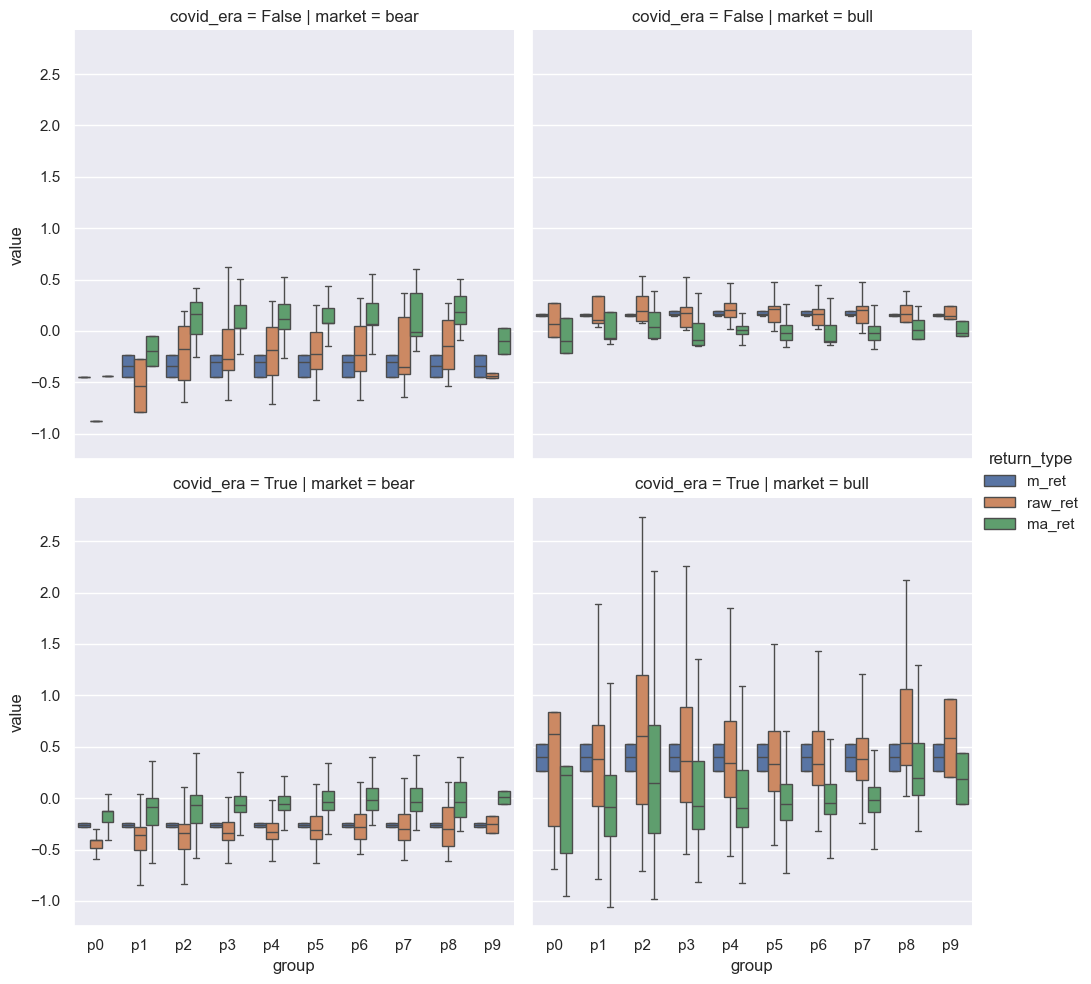

In [30]:
sort_rule = {f'p{i}': i for i in range(10)}
sns.set(rc={'figure.figsize':(8.27, 5)})
p = sns.catplot(
    data=ports2[ports2.group.isin([f'p{i}' for i in range(10)])]
    .sort_values(by=['market'])
    .sort_values(by=['group'], key=lambda series: series.apply(lambda x: sort_rule[x])),
    y="value", hue='return_type', x='group',kind="box",
    showfliers = False,
    col='market',
    row='covid_era',
)
plt.show()

# VaR

In [31]:
pgroup = {
    "plo":"0:low",
    "pmid":"1:mid",
    "phi":"2:high"
}
ports2_temp = filter_pscore_groups(ports2).query('return_type == "ma_ret"').copy()
ports2_temp['group'] = ports2_temp.group.map(pgroup)

caption = "One-Year Raw Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by F-Score"
d = (pd.pivot_table(
        data=ports2_temp,
        columns=['market'],
        values=['value'],
        index=['group'], 
        aggfunc=['mean', p5, ES, MS], 
    )
    .reorder_levels([2, 1, 0], axis=1)
    .sort_index(axis=1)
    .droplevel(1, axis=1)
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)
display(d)
dfi.export(d,"bull_bear_var.png",max_cols=-1)

# Covid Era

In [32]:


caption = "One-Year Raw Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by F-Score"
d = (pd.pivot_table(
        data=ports[ports.group.isin(['market', 'all', 'phi', 'plo'])],
        columns=['market'],
        values=['raw_ret'],#, 'ma_ret'],
        index=['covid_era', 'group', ], 
        aggfunc=['mean', p5, p10, p25, p50, p75, p90, pos, ES, MS], 
        #margins=True
    )
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)
display(d)
dfi.export(d,"port_covid_raw.png",max_cols=-1)
caption = "One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by F-Score"

d = (pd.pivot_table(
        data=ports[ports.group.isin(['market', 'all', 'phi', 'plo'])],
        columns=['market'],
        values=['ma_ret'],#, 'ma_ret'],
        index=['covid_era', 'group', ], 
        aggfunc=['mean', p5, p10, p25, p50, p75, p90, pos, ES, MS], 
        #margins=True
    )
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)
display(d)

dfi.export(d,"port_covid_ma.png",max_cols=-1)

# Alternate Partitions
### In the below section, instead of creating portfolios of stocks, I look at returns from each separate firm. Then I aggregate over the results. These are not portfolio returns.

In [33]:
indiv = augment_individual_stock_bull_bear(highbm, bulls, bears)
# reshape so returns are in separate rows for seaborn
indiv['covid_era'] = pd.to_datetime(indiv.start) > pd.to_datetime('2018-01-01')
indiv2 = pd.melt(indiv, id_vars=['start', 'end', 'market', 'pscore', 'symbol', 'mve_quintile', 'price_quintile', 'pscore_group', 'covid_era'], value_vars=['raw_ret', 'ma_ret', 'm_ret'], var_name='return_type')


# Partitioned by Market Value of Equity

In [34]:

caption = ("One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by F-score <br>"
           "Partitioned by Market Value of Equity")
d = (pd.pivot_table(
    data=indiv2.query('return_type == "ma_ret"'), 
    index=['market', 'pscore_group',], 
    columns=['mve_quintile'], 
    aggfunc=['mean', p10, p25, p50, p75, p90, pos, ], 
    values='value',
#         margins=True
    )
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)
display(d)
dfi.export(d,"bulls_bears_ma_mve.png",max_cols=-1)

# Partitioned by Price

In [35]:

caption = ("One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by F-score <br>"
           "Partitioned by Share Price")
d = (
    pd.pivot_table(
    data=indiv2.query('return_type == "ma_ret"'), 
    index=['market', 'pscore_group',], 
    columns=['price_quintile'], 
    aggfunc=['mean', p10, p25, p50, p75, p90, pos, ], 
    values='value',
#         margins=True
    )
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)

display(d)
dfi.export(d,"bulls_bears_ma_price.png",max_cols=-1)

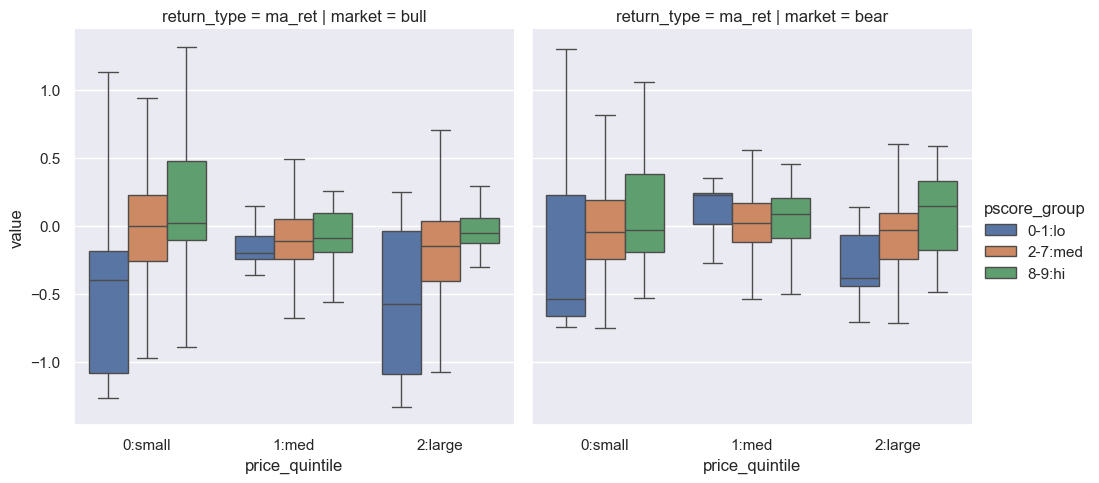

In [36]:

sns.set(rc={'figure.figsize':(8.27, 5)})
indiv_temp = indiv2.query('return_type == "ma_ret"').sort_values(by=['pscore_group']).copy()
p = sns.catplot(
    data = indiv_temp,
    y="value", hue='pscore_group', x='price_quintile',kind="box",
    row='return_type',
    col='market',
    showfliers = False,
)

plt.show()
p.savefig("bulls_bears_ma_price_box.png")


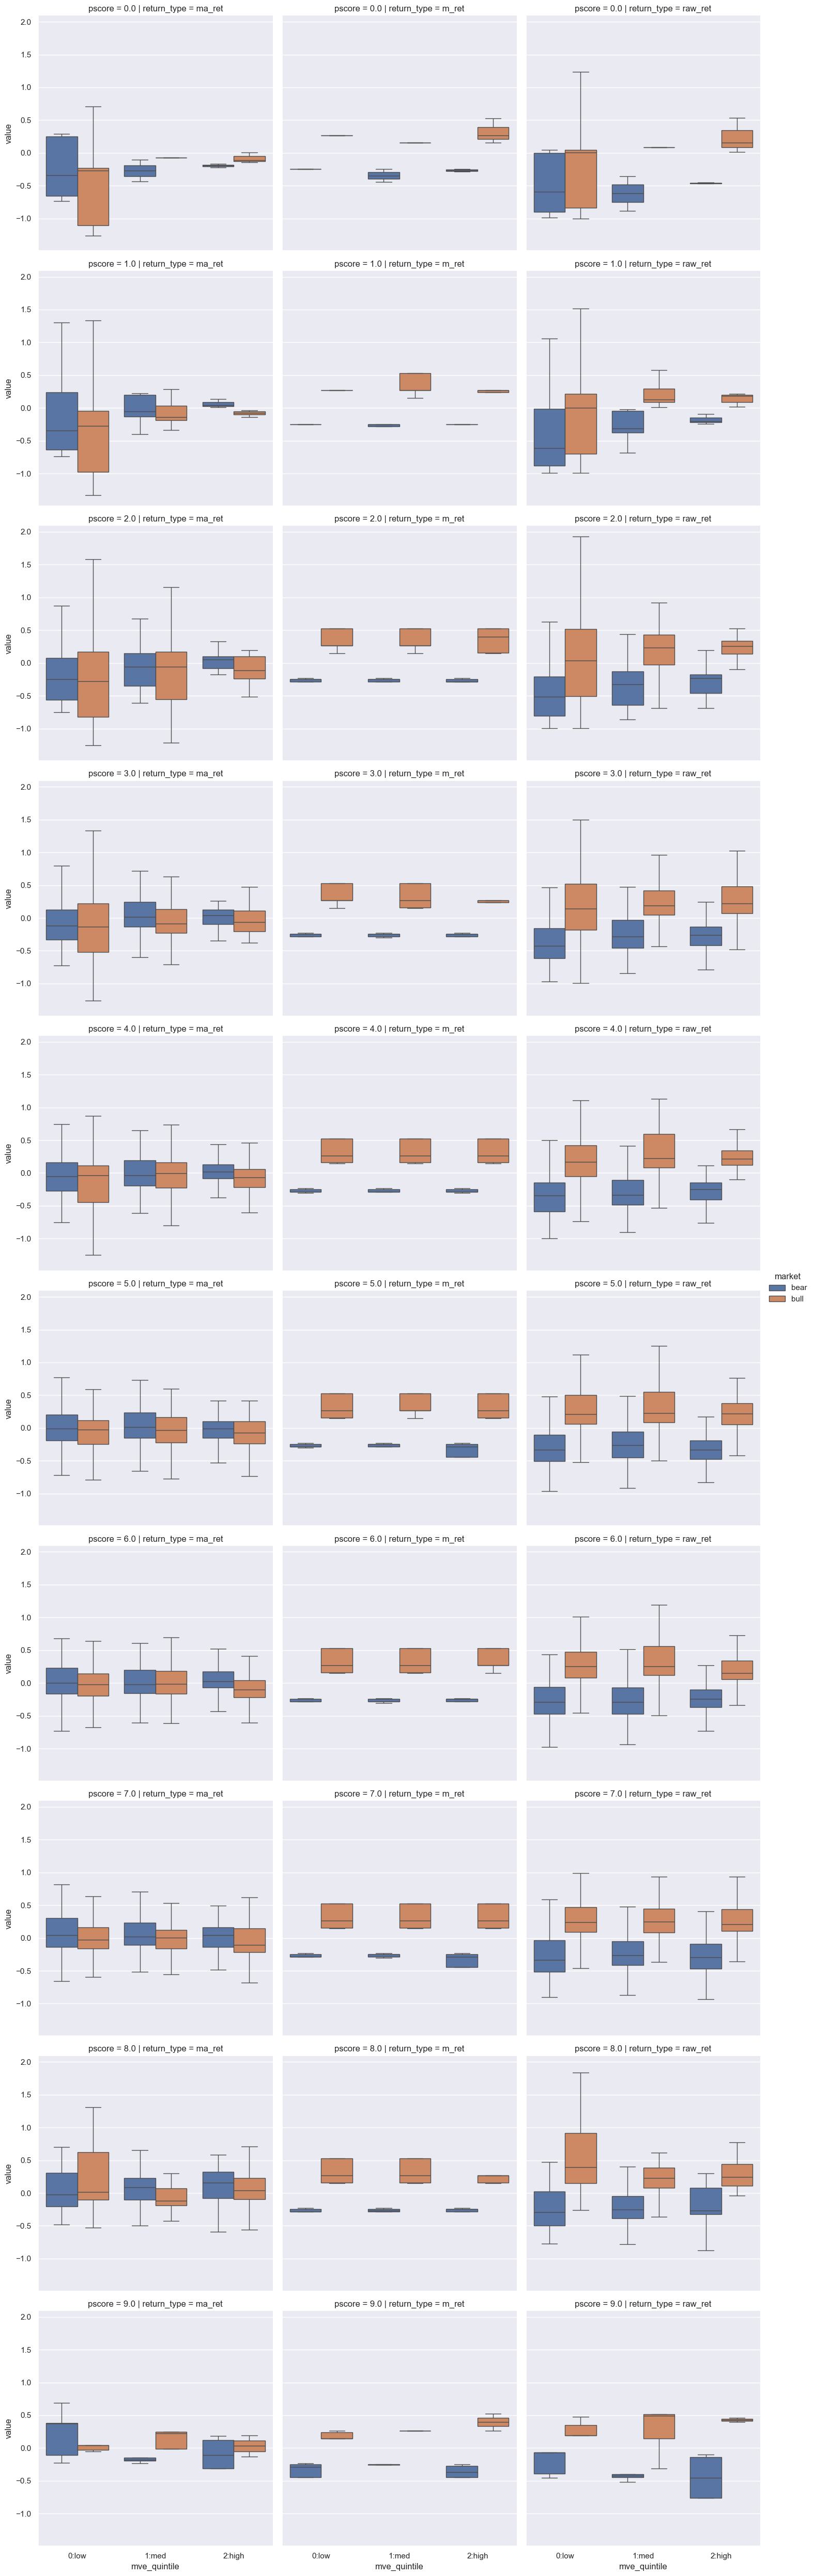

In [37]:

sns.set(rc={'figure.figsize':(8.27, 5)})

p = sns.catplot(
    indiv2.sort_values(by=['mve_quintile']), y="value", hue='market', x='mve_quintile',kind="box",
    col='return_type',
    row='pscore',
    showfliers = False,
)
plt.show()


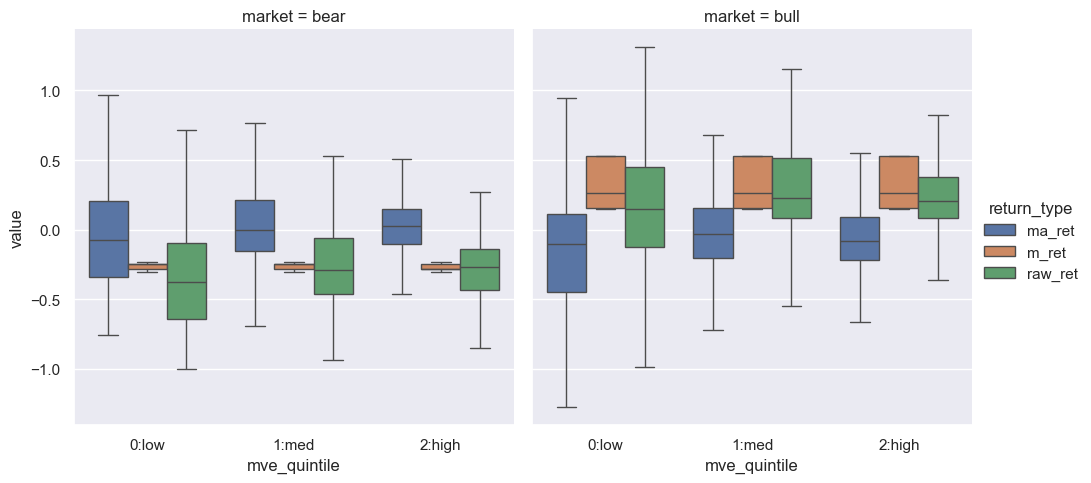

In [38]:

sns.set(rc={'figure.figsize':(8.27, 5)})

p = sns.catplot(
    indiv2.sort_values(by=['mve_quintile']), y="value", hue='return_type', x='mve_quintile',kind="box",
    log_scale=False,
    showfliers = False,
col='market'
)
plt.show()


In [39]:

caption = "One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by F-Score"
display(
    pd.pivot_table(
    data=indiv2, 
    index=['return_type','pscore',], 
    columns=['market'], 
    aggfunc=['mean', p5, p10, p25, p50, p75, p90, pos, ES, MS], 
    values='value',
    )
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)